# Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importing Stopwords
import nltk
from nltk.corpus import stopwords
import string

# models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score



# Import Data

In [2]:
df=pd.read_csv('spam_dataset.csv')

# Basic Analysis

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [5]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
# adding new column as length of the text
df['length'] = df['text'].apply(len)
df.head()

,Unnamed: 0,label,text,label_num,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


# EDA

Text(0.5, 1.0, 'Number of Spam and Ham')

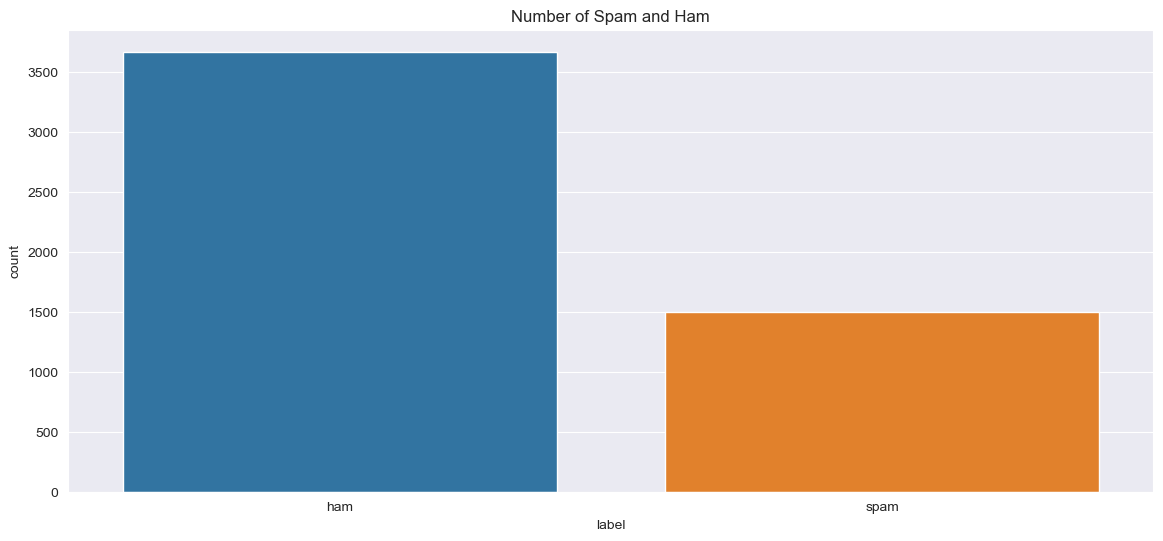

In [8]:
# plot for count of spam and ham in data
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)
plt.title('Number of Spam and Ham')

Text(0.5, 1.0, 'Length of Text')

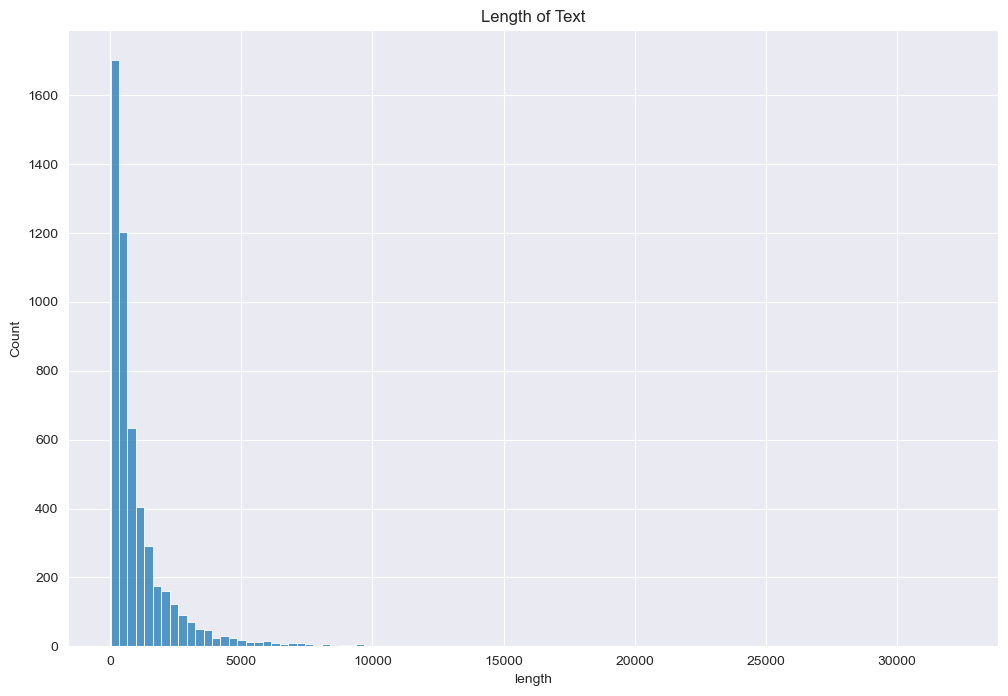

In [9]:
# Plot for distribution lenth of text
plt.figure(figsize=(12,8))
sns.histplot(x='length',data=df,bins=100)
plt.title('Length of Text')

In [10]:
# maximum lenth text 
df[df['length']==df['length'].max()]['text']

949    Subject: fw : " red , white and blue out "\r\n...
Name: text, dtype: object

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

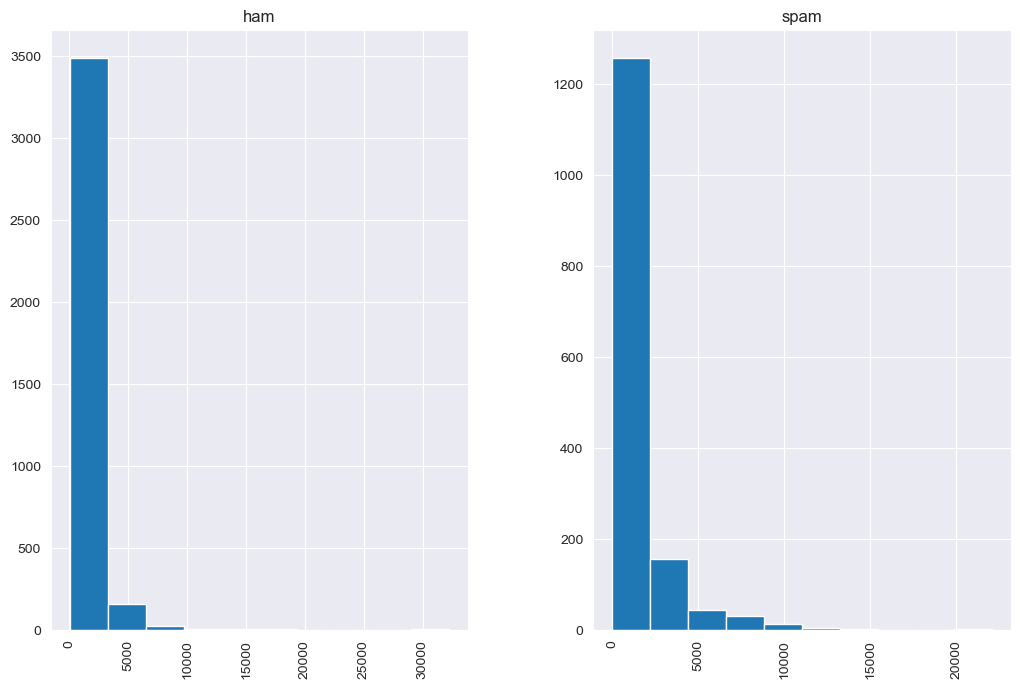

In [11]:
# distribution of spam and ham by length of text
df.hist(column='length',by='label',figsize=(12,8))

# Feature Enginering

In [12]:
# function to remove punctuation and stopwords
def text_process(text):
    non_punc = [char for char in text if char not in string.punctuation]
    non_punc=''.join(non_punc)
    return [word for word in non_punc.split() if word not in stopwords.words('english')]

# Train Test Split

In [13]:
# define X(features),y(target)
X= df['text']
y=df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modles

In [15]:
# creating a pipline to model the data
# pipeline for MultinomialNB
pipe_mnb = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

# pipeline for Random Forest Classifier
pipe_rf =Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# fit the data
pipe_mnb.fit(X_train,y_train)
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000214D97BA7A0>)),
                ('tf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [21]:
# predict the target feature
pred_mnb = pipe_mnb.predict(X_test)
pred_rf = pipe_rf.predict(X_test)

# Prediction Accuracy

In [22]:
# print confusion matrix and classification report
print ('Classification report on MultinomialNB:')
print('\n')
print(classification_report(y_test,pred_mnb))

print('---------------------------------------')

print ('Classification report on Random_forest_Classifier:')
print('\n')
print(classification_report(y_test,pred_rf))

Classification report on MultinomialNB:


              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1246
        spam       1.00      0.69      0.82       461

    accuracy                           0.92      1707
   macro avg       0.95      0.85      0.88      1707
weighted avg       0.93      0.92      0.91      1707

---------------------------------------
Classification report on Random_forest_Classifier:


              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1246
        spam       0.95      0.97      0.96       461

    accuracy                           0.98      1707
   macro avg       0.97      0.98      0.97      1707
weighted avg       0.98      0.98      0.98      1707



Text(0.5, 1.0, 'Confusion Matrix for Multinomial Classifier')

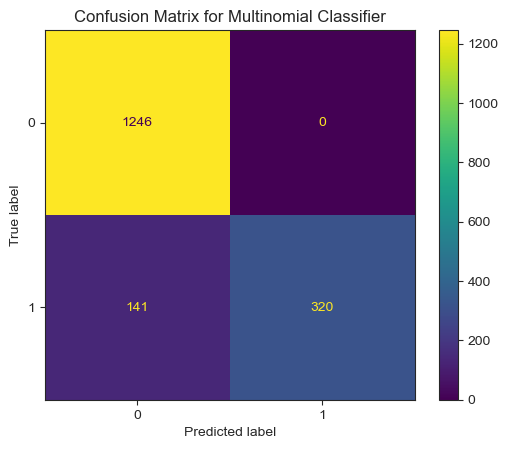

In [23]:
# Display confusioni matrix for MultinomialNB

sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_mnb)).plot()
plt.title("Confusion Matrix for Multinomial Classifier")

Text(0.5, 1.0, 'Confusion Matrix for Random_Forest Classifier')

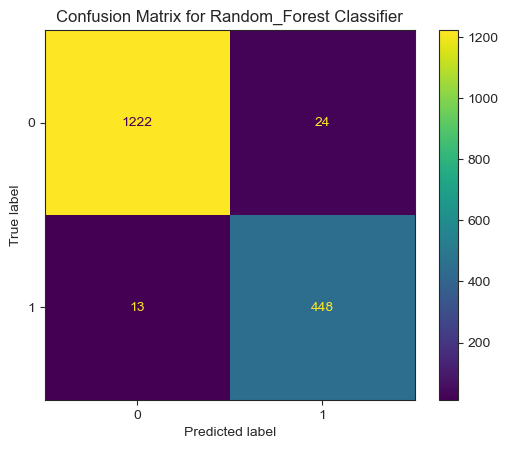

In [24]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_rf)).plot()
plt.title("Confusion Matrix for Random_Forest Classifier")

In [25]:
print('The accuracy for Multinomial Classifer:',accuracy_score(y_test,pred_mnb)*100)
print('The accuracy for Random_forest Classifer:',accuracy_score(y_test,pred_rf)*100)

The accuracy for Multinomial Classifer: 91.73989455184535
The accuracy for Random_forest Classifer: 97.8324545987112


**The Random Forest Model predicts better than Multinomial.**